In [ ]:
import torch
import matplotlib.pyplot as plt

In [ ]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (13.0, 5.0)

## **Train dataset**
Составляем датасет. Возьмем точки из равномерного распределения от 0 до 1 в количестве 100 штук, каждую точку домножим на 20 и отнимем 10, чтобы график был примерно по центру(Это Х)
А У это синус от данных точек


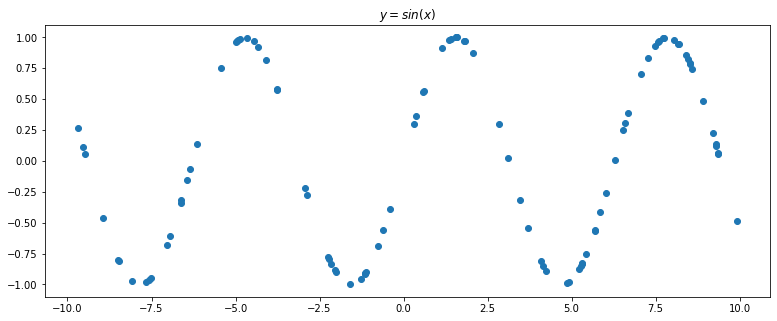

In [ ]:
x_train = torch.rand(100)
x_train = x_train * 20.0 - 10.0

y_train = torch.sin(x_train)

plt.plot(x_train.numpy(), y_train.numpy(), 'o')
plt.title('$y = sin(x)$');

Наша выборка на данный момент слишком простая. Для этого добавим шум:

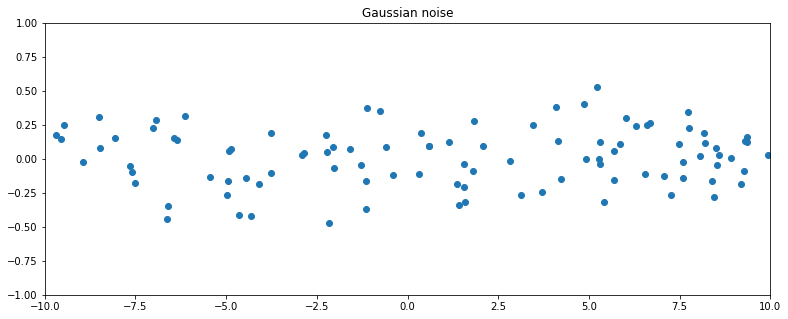

In [ ]:
noise = torch.randn(y_train.shape) / 5.

plt.plot(x_train.numpy(), noise.numpy(), 'o')
plt.axis([-10, 10, -1, 1])
plt.title('Gaussian noise');

И прибавим его к каждой точке нашего датасета. То получим похужую на реальную жизнь обучающаяся выборка.

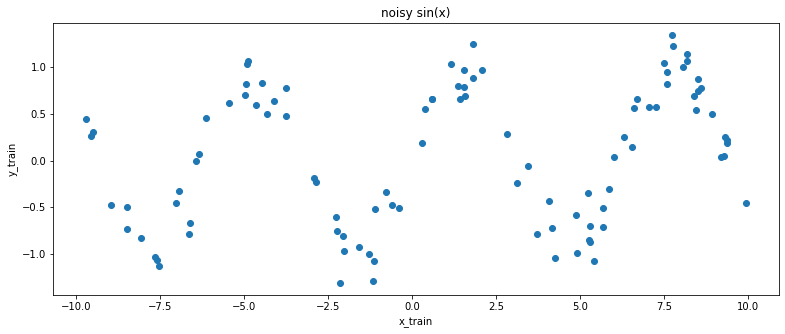

In [ ]:
y_train = y_train + noise
plt.plot(x_train.numpy(), y_train.numpy(), 'o')
plt.title('noisy sin(x)')
plt.xlabel('x_train')
plt.ylabel('y_train');

Метод unsqueeze_ превращает строчку Х в столбец, где на каждой строчке одно число Х.
Если мы видим **Нижнее подчеркивание**, то этот метод изменят тот объект к которому он применяется.

In [ ]:
x_train.unsqueeze_(1)
y_train.unsqueeze_(1);

In [ ]:
tmp = torch.Tensor([1,2,3])
print(tmp)
print(tmp.unsqueeze(1))

tensor([1., 2., 3.])
tensor([[1.],
        [2.],
        [3.]])


## **Validation dataset**
Данные для проверки. В нашем примере мы возьмем обычный синус.

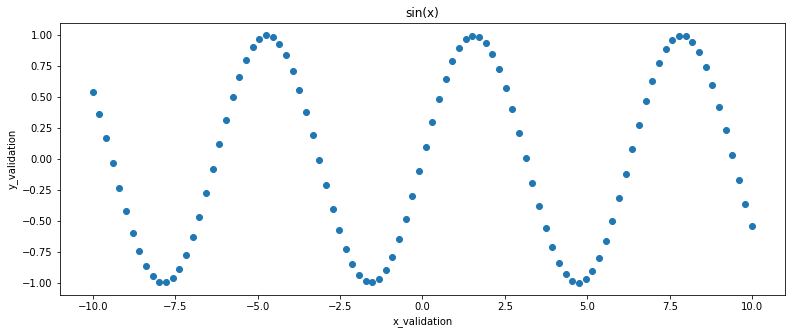

In [ ]:
x_validation = torch.linspace(-10, 10, 100)
y_validation = torch.sin(x_validation.data)
plt.plot(x_validation.numpy(), y_validation.numpy(), 'o')
plt.title('sin(x)')
plt.xlabel('x_validation')
plt.ylabel('y_validation');

In [ ]:
x_validation.unsqueeze_(1)
y_validation.unsqueeze_(1);

## Нейронная сеть
Чтобы создать нс необходимо создать класс(SineNet), ее мы должны унаследовать от класса torch.nn.Module, такое наследование внесет в наш объект дополнительные функции.

Также нам необходимо проинициализировать слои, который мы будем использовать. 

n_hidden_neurons - это количество скрытых нейронов, которые будут храниться в каждом слое.

In [ ]:
class SineNet(torch.nn.Module):
    def __init__(self, n_hidden_neurons):
        super(SineNet, self).__init__()
        """ В PyTorch "fully connected" слой называется "linear". 
            На вход мы передаём количество входных нейронов и количество выходных нейронов.
            Входных нейронов у нас будет один. То есть это, на самом деле, не нейрон будет, а сам вход в нейрон.
            Это одно число "x", координата нашей точки, по которой мы будем что-то предсказывать.
            Если бы у нас координата точки была какая-то многомерная, если точка у нас бы задалась в многомерном пространстве,
            то -- размерность того пространства, которое задаёт точку. Выходных нейронов, у нас будет как раз "n_hidden_neurons".
            После этого нам нужна функция активации.
            Функцию активации мы здесь берем -- сигмоиду.
            В принципе, нам бы подошла любая функция активации.
            Но сигмоида-- самая простая, почему бы и нет.
            Кроме того, мы добавим ещё один полносвязанный слой, но у него будет всего один нейрон.
            Этот нейрон будет нашим ответом на вопрос. """
        self.fc1 = torch.nn.Linear(1, n_hidden_neurons) 
        self.act1 = torch.nn.Sigmoid()                  
        self.fc2 = torch.nn.Linear(n_hidden_neurons, 1) 


    """нужно написать функцию forward, то есть то, как наши слои последовательно применяются.
       Сначала мы применяем слой "fc1", на "x".
       То что получилось мы передаём в функцию активации, то что вышло из функций активации мы передаём в "fc2",
       и вот это же мы возвращаем. То есть, в принципе, функция forward повторяет нашу инициализацию.
       И давайте создадим такую сеть. Количество скрытых нейронов -- 50, чтобы точно хватило. 
       У нас теперь есть "SineNet" -- объект, который, в принципе, можно обучать."""
    def forward(self, x):
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        return x

sine_net = SineNet(50)

Проверка. Обучения еще не было

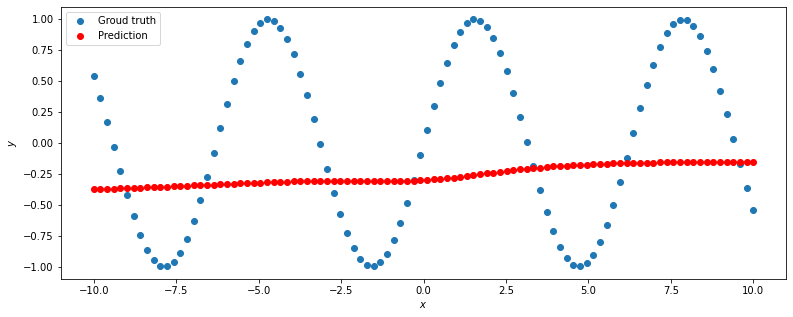

In [ ]:
def predict(net, x, y):
    y_pred = net.forward(x)

    plt.plot(x.numpy(), y.numpy(), 'o', label='Groud truth')
    plt.plot(x.numpy(), y_pred.data.numpy(), 'o', c='r', label='Prediction');
    plt.legend(loc='upper left')
    plt.xlabel('$x$')
    plt.ylabel('$y$')

predict(sine_net, x_validation, y_validation)

## Задача
Давайте попрактикуемся с SineNet:

1) Добавим еще один fc-слой

2) Заменим активацию между слоями на гиперболический тангенс

In [ ]:
# import torch


# class SineNet(torch.nn.Module):
#     def __init__(self, n_hidden_neurons):
#         super(SineNet, self).__init__()
#         self.fc1 = torch.nn.Linear(1, n_hidden_neurons) 
#         self.act1 = torch.nn.Tanh()                  
#         self.fc2 = torch.nn.Linear(n_hidden_neurons, n_hidden_neurons)
#         self.act2 = torch.nn.Tanh() 
#         self.fc3 = torch.nn.Linear(n_hidden_neurons, 1)

#     def forward(self, x):
#         x = self.fc1(x)
#         x = self.act1(x)
#         x = self.fc2(x)
#         x = self.act2(x)
#         x = self.fc3
#         return x


# sine_net = SineNet(int(input()))
# sine_net.forward(torch.Tensor([1.]))

# print(sine_net)

# Обучение нейросети
Чтобы обучит нейросеть нам необходимо:

1. Оптимизатор, который будет совершать шаги градиентного спуска
2. Функция потерь, которая говорит нам насколько непраильно мы предсказали. По ней будет происходит вычисление градиента.

In [ ]:
optimizer = torch.optim.Adam(sine_net.parameters(), lr=0.01)

In [ ]:
def loss(pred, target):
    squares = (pred - target) ** 2  # MSE
    return squares.mean() # Среднее значение

## Начало тренировки

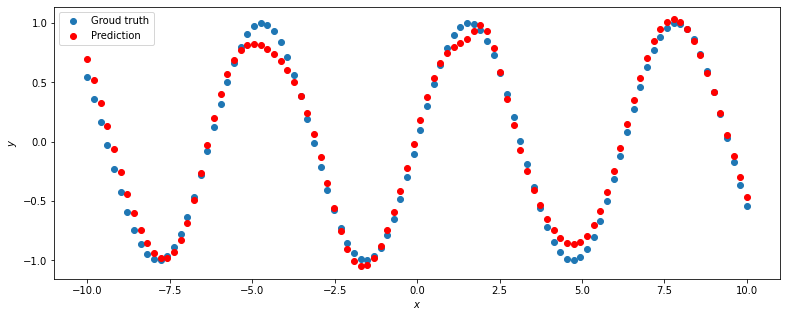

In [ ]:
for epoch_index in range(2000):
    optimizer.zero_grad()

    y_pred = sine_net.forward(x_train) # считаеи предсказания
    loss_val = loss(y_pred, y_train)   # функция потерь(получаем скаляр)

    loss_val.backward()

    optimizer.step()

predict(sine_net, x_validation, y_validation)